<a href="https://colab.research.google.com/github/sagar9926/ComputerVisionProject_FaceDetection/blob/main/hog_svm_face_detection/hog_face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install scikit-image==0.19.3

!{sys.executable} -m pip install opencv-python
%matplotlib inline
import gc
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from skimage import transform
from skimage import data, color, feature
import skimage.data
import cv2
from sklearn.feature_extraction.image import PatchExtractor
from skimage import data, transform
from random import sample
from tqdm import tqdm
import os
from sklearn.svm import NuSVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV


Looking in indexes: https://repository.walmart.com/repository/pypi-proxy/simple/
  Using cached https://repository.cache.walmart.com/repository/pypi-proxy/packages/scikit-image/scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl?originalHref=aHR0cHM6Ly9maWxlcy5weXRob25ob3N0ZWQub3JnL3BhY2thZ2VzLzBmLzI5L2QxNTdjZDY0OGI4NzIxMmU0OTgxODljMTgzYTMyZjBmNDhlMjRmZTIyZTk2NzNkYWNkOTc1OTRmMzlmYS9zY2lraXRfaW1hZ2UtMC4xOS4zLWNwMzktY3AzOS1tYW55bGludXhfMl8xN194ODZfNjQubWFueWxpbnV4MjAxNF94ODZfNjQud2hsI3NoYTI1Nj1mZjNiMTAyNTM1NjUwOGQ0MWY0ZmU0ODUyOGU1MDlkOTVmOWU0MDE1ZTkwY2YxNThjZDU4YzU2ZGM2M2UwYWM1 (14.0 MB)
  Using cached https://repository.cache.walmart.com/repository/pypi-proxy/packages/imageio/imageio-2.28.0-py3-none-any.whl?originalHref=aHR0cHM6Ly9maWxlcy5weXRob25ob3N0ZWQub3JnL3BhY2thZ2VzL2UzLzQ1LzgzMzk5MWI3ZGQzYWJmNDdiMWM1MWVjOTlhYjViZWQ1NTQ2ZDgzZWU0MGQ0NWU3NjFlMzhmOThiNjg2Yy9pbWFnZWlvLTIuMjguMC1weTMtbm9uZS1hbnkud2hsI3NoYTI1Nj04ODlkOWVjYTY2YWM5ZjY2NGQ0ODBiNzg0NDdkYjE3NzRlN2YzOD

In [ ]:
import zipfile
with zipfile.ZipFile("/data/temp_Sagar/temp//yolo_test_100_imgs_fd (1).zip", 'r') as zip_ref:
    zip_ref.extractall('/data/temp_Sagar/temp/fd/')

In [ ]:
!git clone https://github.com/sagar9926/ComputerVisionProject_FaceDetection.git

fatal: destination path 'ComputerVisionProject_FaceDetection' already exists and is not an empty directory.


In [ ]:
!python /data/temp_Sagar//temp/object-detector/extract-features.py -p /data/temp_Sagar//temp/pos -n /data/temp_Sagar//temp/neg

Traceback (most recent call last):
  File "/data/temp_Sagar//temp/object-detector/extract-features.py", line 2, in <module>
    from skimage.feature import local_binary_pattern
ImportError: No module named skimage.feature


In [ ]:
test/ComputerVisionProject_FaceDetection/config/config.cfg

In [ ]:
python test/ComputerVisionProject_FaceDetection/train_face_detection.py -p /home/jupyter/test/ComputerVisionProject_FaceDetection/data/features/pos -n /home/jupyter/test/ComputerVisionProject_FaceDetection/data/features/neg

In [ ]:
from skimage.feature import hog 

In [ ]:
skimage.__version__

'0.20.0'

In [ ]:
!python /data/temp_Sagar//temp/object-detector/train-classifier.py -p /data/temp_Sagar//temp/object-detector/features/pos -n /data/temp_Sagar//temp/object-detector/features/neg

/content/object-detector/object-detector/train-classifier.py:38: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if clf_type is "LIN_SVM":
Training a Linear SVM Classifier
^C


In [ ]:
# Import the required modules
from skimage.feature import local_binary_pattern
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import joblib
import argparse as ap
import glob
import os
import sys
sys.path = sys.path + ['/content/object-detector/object-detector']
from config import *


# Parse the command line arguments
pos_feat_path =  '/data/temp_Sagar//temp/object-detector/features/pos'
neg_feat_path = '/data/temp_Sagar//temp/object-detector/features/neg'
# Classifiers supported
clf_type = 'LIN_SVM'

fds = []
labels = []
# Load the positive features
for feat_path in glob.glob(os.path.join(pos_feat_path,"*.feat")):
    fd = joblib.load(feat_path)
    fds.append(fd)
    labels.append(1)

# Load the negative features
for feat_path in glob.glob(os.path.join(neg_feat_path,"*.feat")):
    fd = joblib.load(feat_path)
    fds.append(fd)
    labels.append(0)

In [ ]:
len(labels)

12757

In [ ]:
fds[0].shape

(2430,)

In [ ]:
clf = LinearSVC()
print ("Training a Linear SVM Classifier")
clf.fit(fds, labels)


Training a Linear SVM Classifier


In [ ]:
if clf_type is "LIN_SVM":
    clf = LinearSVC()
    print ("Training a Linear SVM Classifier")
    clf.fit(fds, labels)
    # If feature directories don't exist, create them
    if not os.path.isdir(os.path.split(model_path)[0]):
        os.makedirs(os.path.split(model_path)[0])
    joblib.dump(clf, model_path)
    print( "Classifier saved to {}".format(model_path)
)

In [ ]:
import shutil
shutil.make_archive('/content/object-detector', 'zip', '/content/object-detector')

'/content/object-detector.zip'

In [ ]:
import shutil
shutil.make_archive('/content/data', 'zip', '/content/data')

'/content/data.zip'

In [ ]:
!mkdir /content/drive/MyDrive/HOG_face_detection2

In [ ]:
!cp /content/data.zip /content/drive/MyDrive/HOG_face_detection2

In [ ]:
!cp /content/object-detector.zip /content/drive/MyDrive/HOG_face_detection2

In [ ]:
%%writefile /data/temp_Sagar/temp//object-detector/nms.py
def overlapping_area(detection_1, detection_2):
    '''
    Function to calculate overlapping area'si
    `detection_1` and `detection_2` are 2 detections whose area
    of overlap needs to be found out.
    Each detection is list in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    The function returns a value between 0 and 1,
    which represents the area of overlap.
    0 is no overlap and 1 is complete overlap.
    Area calculated from ->
    http://math.stackexchange.com/questions/99565/simplest-way-to-calculate-the-intersect-area-of-two-rectangles
    '''
    # Calculate the x-y co-ordinates of the 
    # rectangles
    x1_tl = detection_1[0]
    x2_tl = detection_2[0]
    x1_br = detection_1[0] + detection_1[3]
    x2_br = detection_2[0] + detection_2[3]
    y1_tl = detection_1[1]
    y2_tl = detection_2[1]
    y1_br = detection_1[1] + detection_1[4]
    y2_br = detection_2[1] + detection_2[4]
    # Calculate the overlapping Area
    x_overlap = max(0, min(x1_br, x2_br)-max(x1_tl, x2_tl))
    y_overlap = max(0, min(y1_br, y2_br)-max(y1_tl, y2_tl))
    overlap_area = x_overlap * y_overlap
    area_1 = detection_1[3] * detection_2[4]
    area_2 = detection_2[3] * detection_2[4]
    total_area = area_1 + area_2 - overlap_area
    return overlap_area / float(total_area)

def nms(detections, threshold=.5):
    '''
    This function performs Non-Maxima Suppression.
    `detections` consists of a list of detections.
    Each detection is in the format ->
    [x-top-left, y-top-left, confidence-of-detections, width-of-detection, height-of-detection]
    If the area of overlap is greater than the `threshold`,
    the area with the lower confidence score is removed.
    The output is a list of detections.
    '''
    if len(detections) == 0:
        return []
    # Sort the detections based on confidence score
    detections = sorted(detections, key=lambda detections: detections[2],
            reverse=True)
    # Unique detections will be appended to this list
    new_detections=[]
    # Append the first detection
    new_detections.append(detections[0])
    # Remove the detection from the original list
    del detections[0]
    # For each detection, calculate the overlapping area
    # and if area of overlap is less than the threshold set
    # for the detections in `new_detections`, append the 
    # detection to `new_detections`.
    # In either case, remove the detection from `detections` list.
    for index, detection in enumerate(detections):
        for new_detection in new_detections:
            if overlapping_area(detection, new_detection) > threshold:
                del detections[index]
                break
        else:
            new_detections.append(detection)
            del detections[index]
    return new_detections

if __name__ == "__main__":
    # Example of how to use the NMS Module
    detections = [[31, 31, .9, 10, 10], [31, 31, .12, 10, 10], [100, 34, .8,10, 10]]
    print ("Detections before NMS = {}".format(detections))
    print ("Detections after NMS = {}".format(nms(detections)))


Overwriting /data/temp_Sagar/temp//object-detector/nms.py


In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/data/temp_Sagar/temp//object-detector']
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from config import *


def sliding_window(image, window_size, step_size):
    '''
    This function returns a patch of the input image `image` of size equal
    to `window_size`. The first image returned top-left co-ordinates (0, 0) 
    and are increment in both x and y directions by the `step_size` supplied.
    So, the input parameters are -
    * `image` - Input Image
    * `window_size` - Size of Sliding Window
    * `step_size` - Incremented Size of Window

    The function returns a tuple -
    (x, y, im_window)
    where
    * x is the top-left x co-ordinate
    * y is the top-left y co-ordinate
    * im_window is the sliding window image
    '''
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])



In [ ]:
model_path = '/home/jupyter/test/svm.model'

In [ ]:
min_wdw_sz

(100, 100)

In [ ]:
conf_score = 1.1

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (170, 100)
Scale ->  0 | Confidence Score [1.66891036] 

Detection:: Location -> (170, 400)
Scale ->  1 | Confidence Score [1.13479546] 

Detection:: Location -> (120, 310)
Scale ->  2 | Confidence Score [1.32780992] 

Detection:: Location -> (130, 310)
Scale ->  2 | Confidence Score [1.13503093] 

Raw Detections before NMS


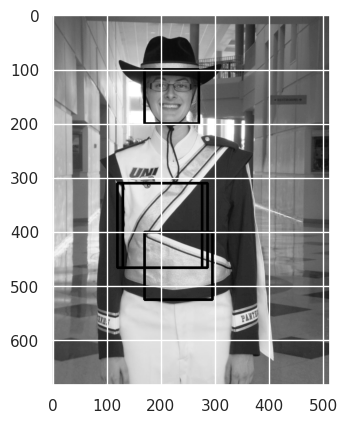

Final Detections after applying NMS


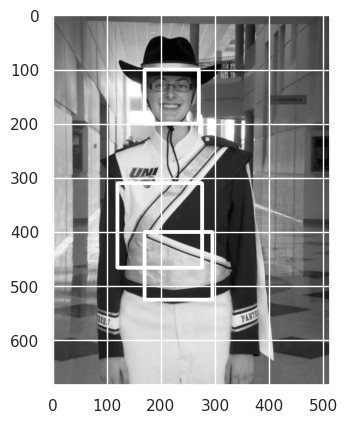

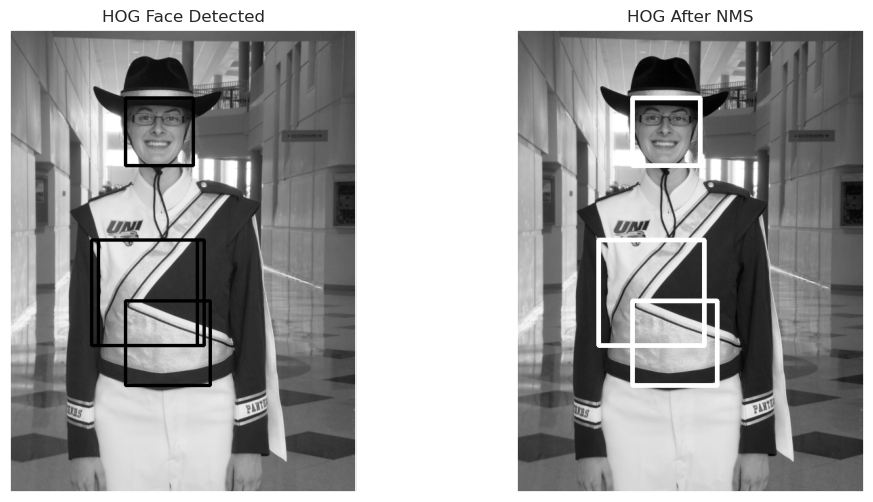

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/0_Parade_marchingband_1_641.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

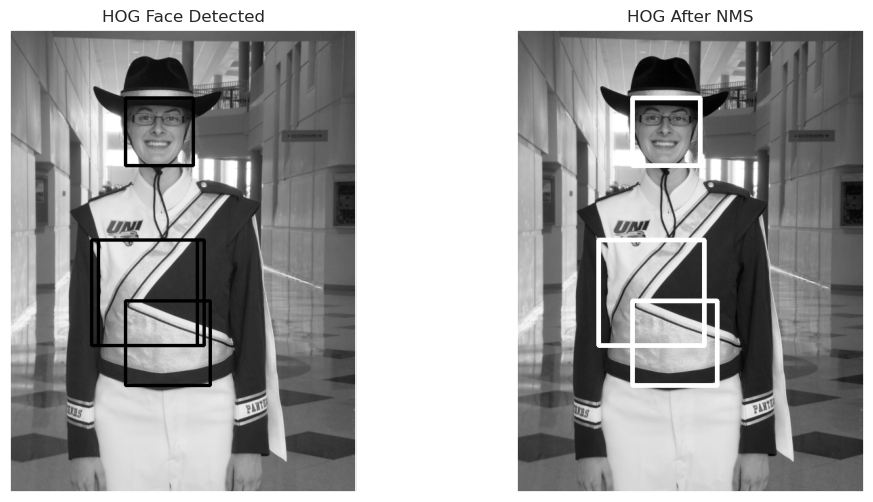

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (250, 140)
Scale ->  0 | Confidence Score [1.48340733] 

Detection:: Location -> (270, 650)
Scale ->  0 | Confidence Score [1.27943427] 

Detection:: Location -> (210, 510)
Scale ->  1 | Confidence Score [1.44749572] 

Detection:: Location -> (220, 510)
Scale ->  1 | Confidence Score [1.42434159] 

Raw Detections before NMS


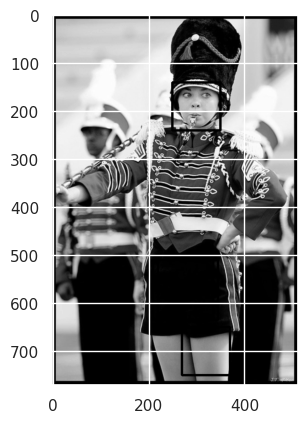

Final Detections after applying NMS


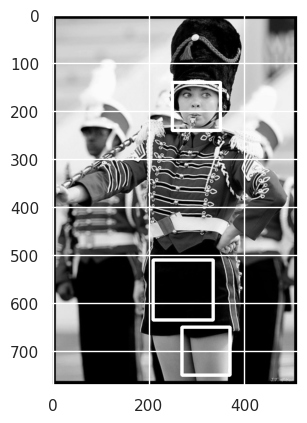

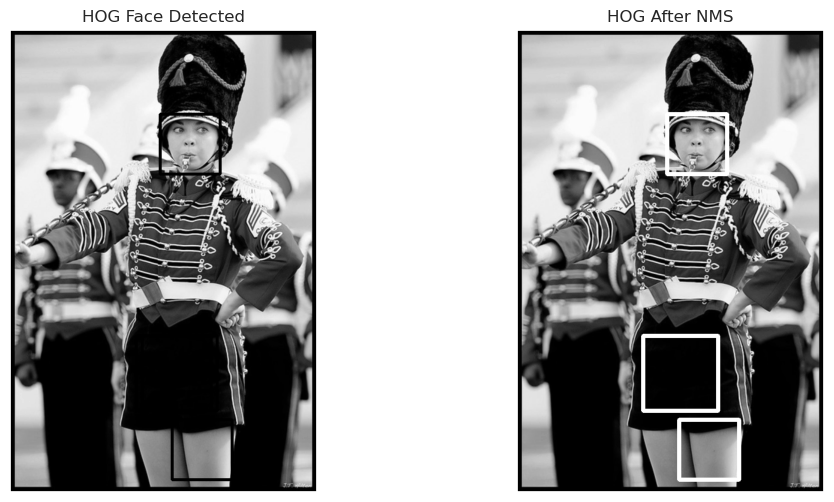

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/0_Parade_marchingband_1_706.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (190, 60)
Scale ->  0 | Confidence Score [1.60814872] 

Detection:: Location -> (190, 70)
Scale ->  0 | Confidence Score [1.75962995] 

Raw Detections before NMS


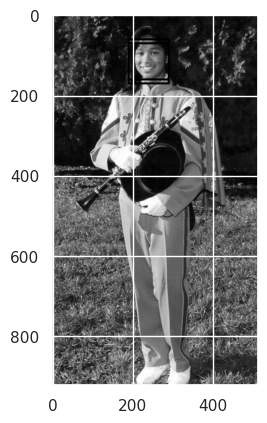

Final Detections after applying NMS


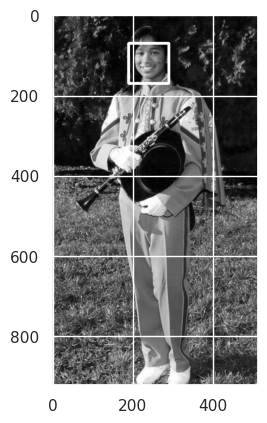

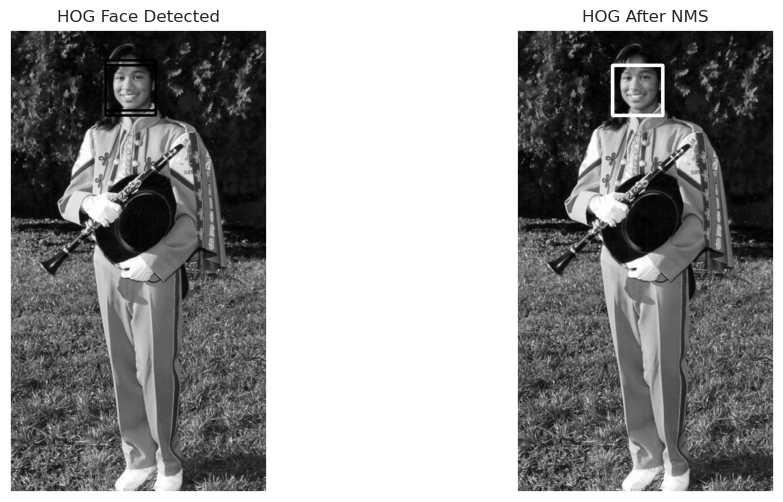

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/0_Parade_marchingband_1_732.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Raw Detections before NMS


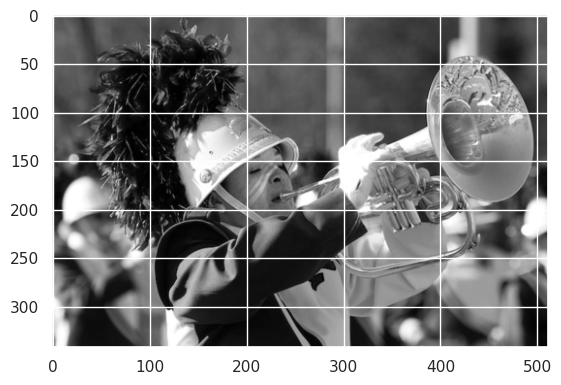

Final Detections after applying NMS


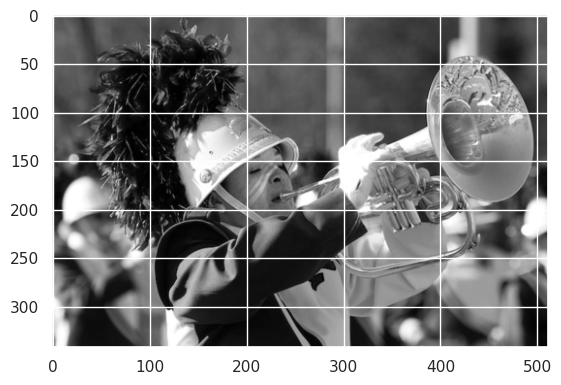

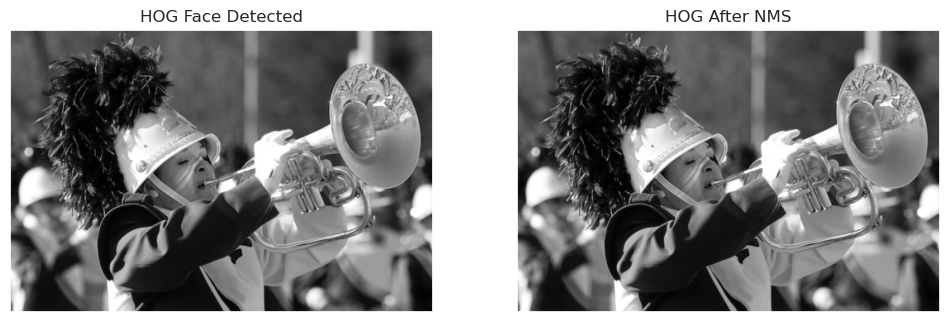

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/0_Parade_marchingband_1_743.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (50, 50)
Scale ->  1 | Confidence Score [1.1200322] 

Raw Detections before NMS


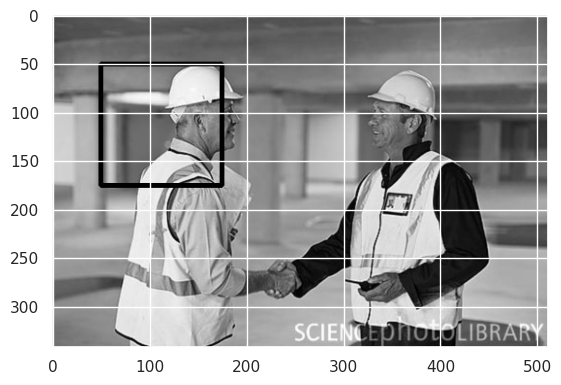

Final Detections after applying NMS


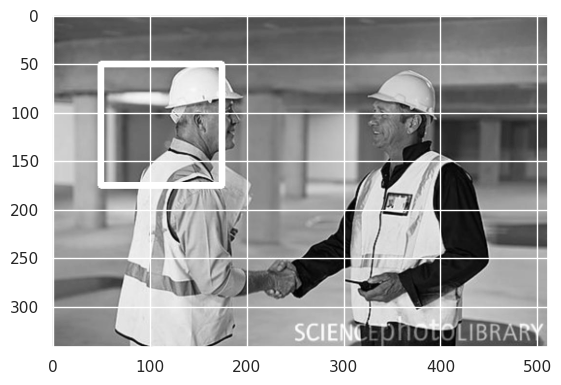

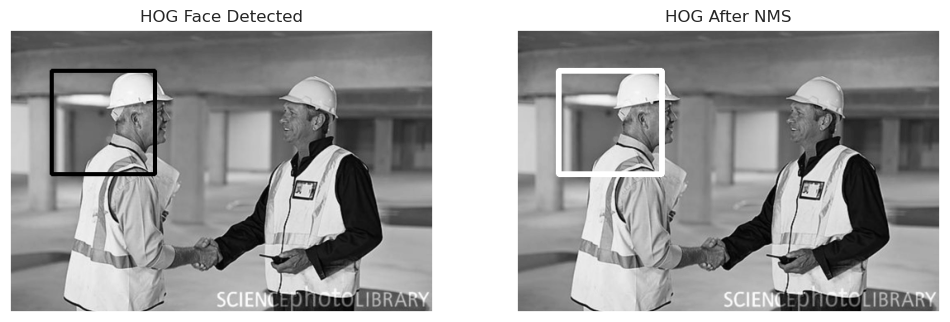

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/1_Handshaking_Handshaking_1_854.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (270, 50)
Scale ->  0 | Confidence Score [1.995785] 

Raw Detections before NMS


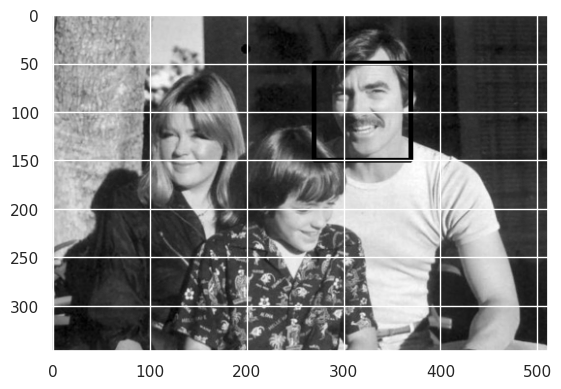

Final Detections after applying NMS


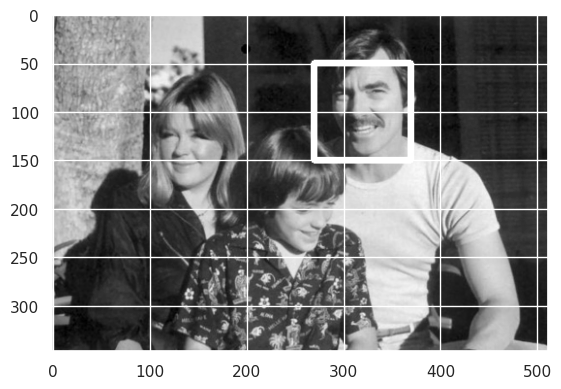

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (270, 50)
Scale ->  0 | Confidence Score [1.995785] 

Detection:: Location -> (270, 60)
Scale ->  0 | Confidence Score [1.09178966] 

Raw Detections before NMS


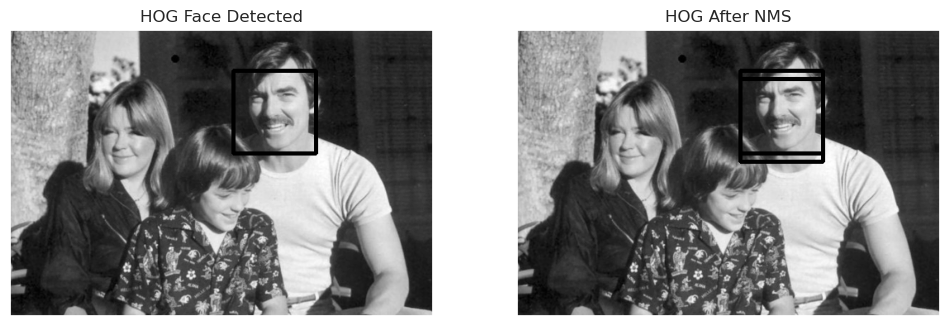

Final Detections after applying NMS


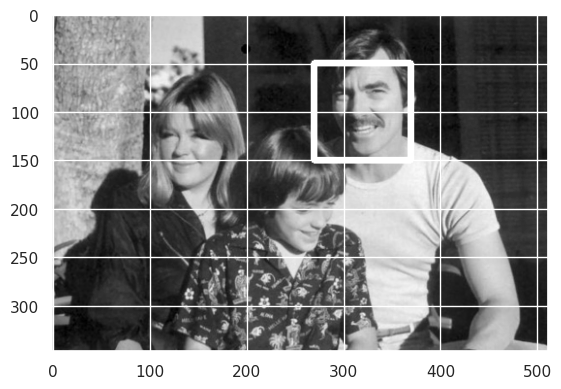

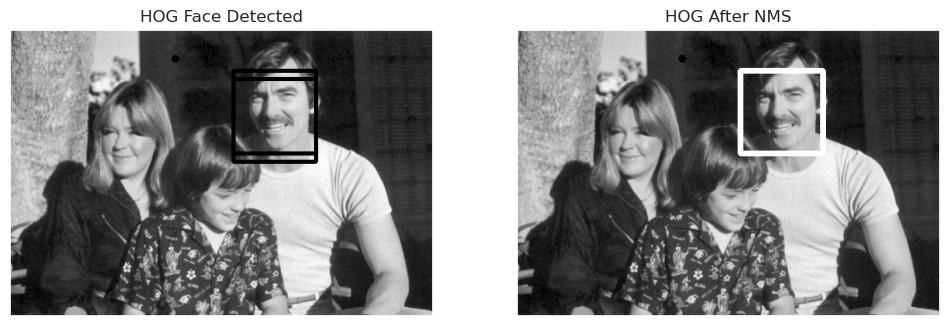

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/1_Handshaking_Handshaking_1_885.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/1_Handshaking_Handshaking_1_885.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > 0.9:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (100, 170)
Scale ->  1 | Confidence Score [1.31911752] 

Detection:: Location -> (110, 170)
Scale ->  1 | Confidence Score [1.61852627] 

Raw Detections before NMS


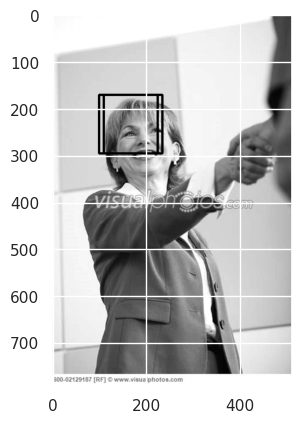

Final Detections after applying NMS


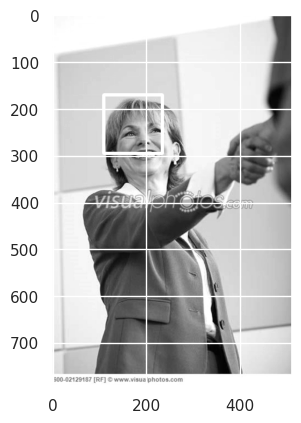

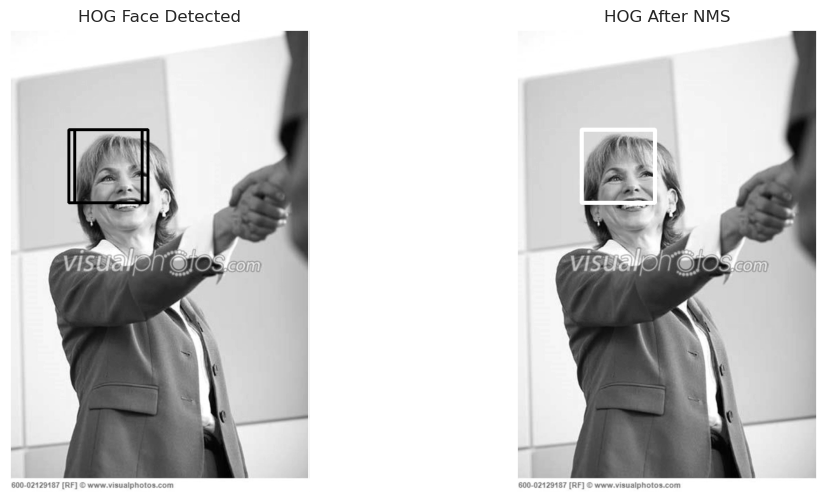

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/data/temp_Sagar/temp/fd/content/test5/1_Handshaking_Handshaking_1_924.jpg', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd),
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (0, 0, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=3)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=5)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('HOG Face Detected')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('HOG After NMS');# Import the required modules


/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (190, 60)
Scale ->  0 | Confidence Score [0.75323727] 

Detection:: Location -> (200, 60)
Scale ->  0 | Confidence Score [0.48206124] 

Detection:: Location -> (490, 60)
Scale ->  0 | Confidence Score [0.07005625] 

Detection:: Location -> (200, 70)
Scale ->  0 | Confidence Score [0.32671505] 

Detection:: Location -> (230, 100)
Scale ->  0 | Confidence Score [1.65387967] 

Detection:: Location -> (240, 100)
Scale ->  0 | Confidence Score [0.5174182] 

Detection:: Location -> (220, 110)
Scale ->  0 | Confidence Score [0.05460711] 

Detection:: Location -> (230, 110)
Scale ->  0 | Confidence Score [1.60265521] 

Detection:: Location -> (240, 110)
Scale ->  0 | Confidence Score [0.76482767] 

Detection:: Location -> (230, 120)
Scale ->  0 | Confidence Score [0.35117281] 

Detection:: Location -> (110, 170)
Scale ->  0 | Confidence Score [0.21614862] 

Detection:: Location -> (100, 180)
Scale ->  0 | Confidence Score [0.22352303] 

Detection:: Location -> (110, 180

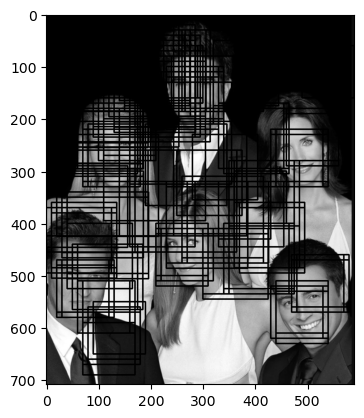

Final Detections after applying NMS


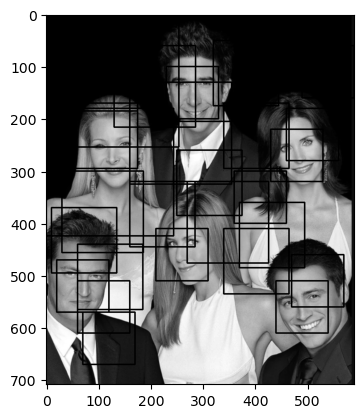

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt

if __name__ == "__main__":

  # Read the image
  im = imread('/home/jupyter/1234.png', as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              print  ("Detection:: Location -> ({}, {})".format(x, y))
              print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
              detections.append((x, y, clf.decision_function(fd),
                  int(min_window_size[0]*(downscale**scale)),
                  int(min_window_size[1]*(downscale**scale))))
              cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (255, 255, 0), thickness=2)
              plt.imshow(clone)
              cv2.waitKey(30)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.waitKey()

  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 0), thickness=2)
  plt.imshow(clone,cmap = 'gray')
  plt.show()
  cv2.waitKey()


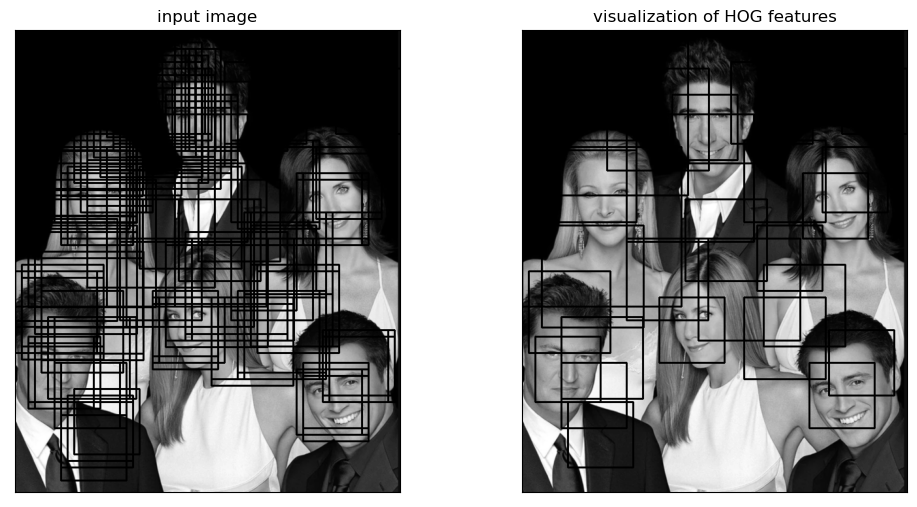

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(clone, cmap='gray')
ax[1].set_title('visualization of HOG features');

# yolo dataset

In [ ]:
# Import the required modules
import sys
sys.path.append("..")
sys.path = sys.path + ['/home/jupyter/test/ComputerVisionProject_FaceDetection']
from skimage.transform import pyramid_gaussian , resize
from skimage.io import imread
from skimage.feature import hog
import joblib
import cv2
import argparse as ap
from nms import nms
from sliding_window import sliding_window
from config import *
import matplotlib.pyplot as plt
import pickle

In [ ]:
len(os.listdir('/data/temp_Sagar/temp/fd/content//test5'))

101

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Detection:: Location -> (190, 80)
Scale ->  0 | Confidence Score [1.78203629] 

Detection:: Location -> (250, 320)
Scale ->  0 | Confidence Score [1.13611646] 

Detection:: Location -> (330, 510)
Scale ->  0 | Confidence Score [0.88513126] 

Detection:: Location -> (140, 580)
Scale ->  0 | Confidence Score [0.8572162] 

Detection:: Location -> (130, 590)
Scale ->  0 | Confidence Score [0.86758476] 

Detection:: Location -> (170, 350)
Scale ->  2 | Confidence Score [0.86329979] 

Detection:: Location -> (80, 370)
Scale ->  2 | Confidence Score [0.91488174] 

Raw Detections before NMS


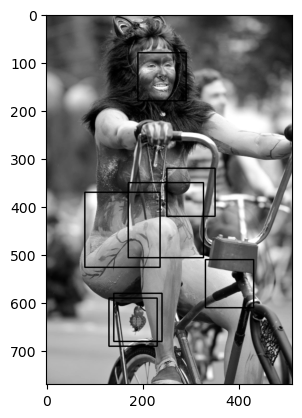

Final Detections after applying NMS


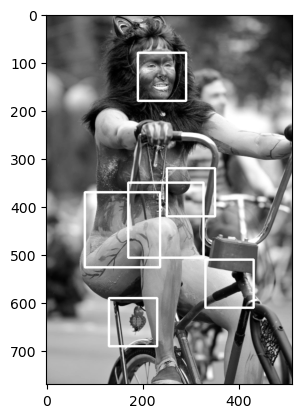

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Raw Detections before NMS


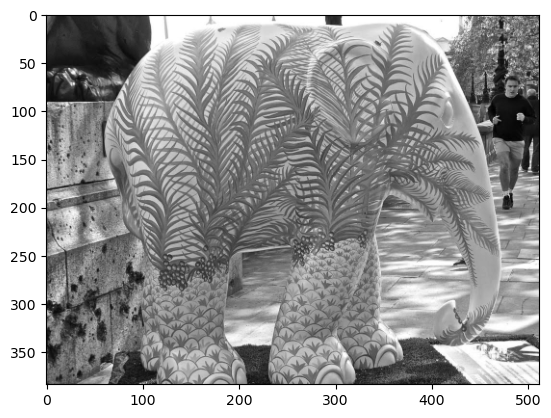

Final Detections after applying NMS


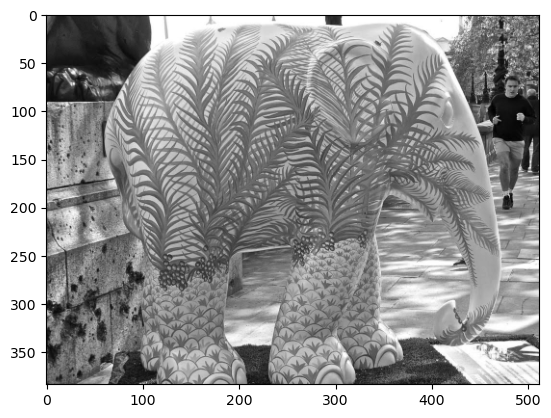

/libraries/ares-py39/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Raw Detections before NMS


In [ ]:
dir_path = '/data/temp_Sagar/temp/fd/content//test5'
conf_score = 0.8
import gc


for img_name in os.listdir(dir_path) :
  gc.collect()
  result_dict = dict()
  img_path = dir_path + "/" + img_name
  # Read the image
  im = imread(img_path, as_gray=True)
  im = resize(im, (im.shape[0] // 2, im.shape[1] // 2),
                       anti_aliasing=True)
  
  downscale = 1.25
  visualize_det = True

  # Load the classifier
  clf = joblib.load('/home/jupyter//ComputerVisionProject_FaceDetection/models/svm.model')

  # List to store the detections
  detections = []
  # The current scale of the image
  scale = 0
  # Downscale the image and iterate
  for im_scaled in pyramid_gaussian(im, downscale=downscale):
      # This list contains detections at the current scale
      cd = []
      # If the width or height of the scaled image is less than
      # the width or height of the window, then end the iterations.
      if im_scaled.shape[0] < min_window_size[1] or im_scaled.shape[1] < min_window_size[0]:
          break
      for (x, y, im_window) in sliding_window(im_scaled, min_window_size, step_size):
          if im_window.shape[0] != min_window_size[1] or im_window.shape[1] != min_window_size[0]:
              continue
          # Calculate the HOG features
          fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize = visualize, block_norm = normalize).reshape(1, -1)
          pred = clf.predict(fd)
          if pred == 1:
              if clf.decision_function(fd) > conf_score:
                  print  ("Detection:: Location -> ({}, {})".format(x, y))
                  print ("Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd)))
                  detections.append((x, y, clf.decision_function(fd)[0],
                      int(min_window_size[0]*(downscale**scale)),
                      int(min_window_size[1]*(downscale**scale))))
                  cd.append(detections[-1])
              
          # If visualize is set to true, display the working
          # of the sliding window
          if visualize_det:
              clone = im_scaled.copy()
              for x1, y1, _, _, _  in cd:
                  # Draw the detections at this scale
                  cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                      im_window.shape[0]), (0, 0, 0), thickness=2)
              cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                  im_window.shape[0]), (255, 255, 0), thickness=2)
              plt.imshow(clone)
      # Move the the next scale
      scale+=1

  # Display the results before performing NMS
  clone = im.copy()
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(im, (x_tl, y_tl), (x_tl+w, y_tl+h), (0, 0, 0), thickness=2)
  print("Raw Detections before NMS",)
  plt.imshow(im,cmap = 'gray')
  plt.show()
  cv2.imwrite('/data/temp_Sagar/temp/fd/hog_result/hog_result_'+img_name,255*im)
  # Perform Non Maxima Suppression
  detections = nms(detections, threshold = 0.3)
  result_dict[img_name] = detections
  import json
  with open('/data/temp_Sagar/temp/fd/hog_result/hog_result_'+img_name +'.json', 'w') as f:
    json.dump(result_dict, f)

  # Display the results after performing NMS
  print("Final Detections after applying NMS")
  for (x_tl, y_tl, _, w, h) in detections:
      # Draw the detections
      cv2.rectangle(clone, (x_tl, y_tl), (x_tl+w,y_tl+h), (1, 1, 1), thickness=3)
  plt.imshow(clone,cmap = 'gray')
  cv2.imwrite('/data/temp_Sagar/temp/fd/hog_result/hog_result_nms_'+img_name,255*clone)
  plt.show()


In [ ]:
img_name

'0_Parade_Parade_0_904.jpg'

-1.2809563423177037

In [ ]:
l = [1,2,3]

In [ ]:
l

[1, 2, 3]

In [ ]:
str(l)

'[1, 2, 3]'

In [ ]:
result_dict

NameError: name 'result_dict' is not defined

In [ ]:
detections

[(10, 60, array([1.69112804]), 100, 100)]

In [ ]:
plt.imshow(img)

In [ ]:
im = cv2.imread('/home/jupyter/1.png')

True

In [ ]:
print("done")

done


In [ ]:
import shutil
shutil.make_archive('/data/temp_Sagar/temp/fd/hog_result/', 'zip', '/data/temp_Sagar/temp/fd/hog_result')

'/data/temp_Sagar/temp/fd/hog_result.zip'